In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'prophet'

In [2]:
df=pd.read_csv('JB_DATA.csv')

In [3]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [4]:
df.head()

,# created_date,id,created_by,created_name,transaction_branch_id,branch_name,branch_email,branch_type,transaction_type_id,member_card,Member_Name,email,Number_of_Months,transaction_date,amount_paid,Coupon_Discount,magazine_fee_paid,payable_amount,reading_fee_paid,reversed,over_due_adjustment_amount,last_card_number,display_name,primus_amount,adjustment_amount,security_deposit,Percentage_Share,subscription_id,member_branch_id,transaction,Transaction_Month,Transaction_Year,Month_Last_Date,TAX_TYPE,Renewal_Amount,taxable_amount,TAX_AMOUNT,GST_AMOUNT,SGST_AMOUNT,CGST_AMOUNT,IGST_AMOUNT,Message_Status,Membership_expiry_date,TAX_STATE,User_Name
0,06-07-2024,41571158,39977,FRONTOFFICE ELC,131,Electronic City Phase 1,frontoffice@elc1.justbooksclc.com,Active User Branch,4,M227544,Deep,ca.deepdhorda@gmail.com,1,06-07-2024,118,0.0,0.0,118,0.0,0,0,NaN,Default package,0,0,0,30,40019446,131,Others,7,2024,31-07-2024,GST,205,100,18.00,18.00,9.00,9.00,0.0,0,17-09-2024,KARNATAKA,avinashmodaliyar1
1,06-07-2024,41571159,10127,FRONTOFFICE VBL,26,Vijaya Bank Layout,sreejaya.shenoy@vij.justbooksclc.com,Profit share,2,M177663,NARENDRAN,diva_dos@yahoo.com,1,06-07-2024,354,0.0,0.0,354,354.0,0,0,9425.0,Default package,0,0,0,50,1292928,26,Renewal,7,2024,31-07-2024,GST,205,300,54.00,54.00,27.00,27.00,0.0,0,06-08-2024,KARNATAKA,blrdrmembers
2,06-07-2024,41571160,39977,FRONTOFFICE ELC,131,Electronic City Phase 1,frontoffice@elc1.justbooksclc.com,Active User Branch,2,M200974,RUDRA ACHARYA,rudraach@gmail.com,12,06-07-2024,4531,1132.8,0.0,4531,4531.2,0,0,NaN,Default package,0,0,0,30,1793454,131,Renewal,7,2024,31-07-2024,GST,205,3840,691.17,691.17,345.58,345.58,0.0,0,06-07-2025,KARNATAKA,avinashmodaliyar1
3,06-07-2024,41571161,39966,FRONT OFFICE HSR,126,HSR Layout,frontoffice@hsr.justbooksclc.com,Active User Branch,1,M227899,Veena Venugopal,veenasiofed@gmail.com,6,06-07-2024,2548,881.2,0.0,2548,2548.8,0,0,NaN,Default package,0,0,0,35,40019952,126,Signup,7,2024,31-07-2024,GST,205,2159,388.68,388.68,194.34,194.34,0.0,0,06-01-2025,KARNATAKA,avinashmodaliyar1
4,06-07-2024,41571162,40016,SRIVALLI HN,108,Nagarabhavi BDA Complex,frontoffice@kng.justbooksclc.com,Profit share,2,M226803,SUSHMA C,avijiois@gmail.com,3,06-07-2024,1416,0.0,0.0,1416,1416.0,0,0,NaN,Default package,0,0,0,40,40018656,108,Renewal,7,2024,31-07-2024,GST,205,1200,216.00,216.00,108.00,108.00,0.0,0,06-10-2024,KARNATAKA,blrdrmembers


In [5]:
df.shape

(35286, 45)

In [6]:
df.columns

Index(['# created_date', 'id', 'created_by', 'created_name',
       'transaction_branch_id', 'branch_name', 'branch_email', 'branch_type',
       'transaction_type_id', 'member_card', 'Member_Name', 'email',
       'Number_of_Months', 'transaction_date', 'amount_paid',
       'Coupon_Discount', 'magazine_fee_paid', 'payable_amount',
       'reading_fee_paid', 'reversed', 'over_due_adjustment_amount',
       'last_card_number', 'display_name', 'primus_amount',
       'adjustment_amount', 'security_deposit', 'Percentage_Share',
       'subscription_id', 'member_branch_id', 'transaction',
       'Transaction_Month', 'Transaction_Year', 'Month_Last_Date', 'TAX_TYPE',
       'Renewal_Amount', 'taxable_amount', 'TAX_AMOUNT', 'GST_AMOUNT',
       'SGST_AMOUNT', 'CGST_AMOUNT', 'IGST_AMOUNT', 'Message_Status',
       'Membership_expiry_date', 'TAX_STATE', 'User_Name'],
      dtype='object')

In [7]:
df.isna().sum()

# created_date                    0
id                                0
created_by                        0
created_name                      0
transaction_branch_id             0
branch_name                       0
branch_email                      0
branch_type                       0
transaction_type_id               0
member_card                       0
Member_Name                       0
email                             0
Number_of_Months                  0
transaction_date                  0
amount_paid                       0
Coupon_Discount                   0
magazine_fee_paid                 0
payable_amount                    0
reading_fee_paid                  0
reversed                          0
over_due_adjustment_amount        0
last_card_number              23936
display_name                      0
primus_amount                     0
adjustment_amount                 0
security_deposit                  0
Percentage_Share                  0
subscription_id             

In [5]:
df.to_csv('sales_data.csv', index=False)

In [8]:
df=pd.read_csv('sales_data.csv')

In [13]:
df.head()

,# created_date,id,created_by,created_name,transaction_branch_id,branch_name,branch_email,branch_type,transaction_type_id,member_card,Member_Name,email,Number_of_Months,transaction_date,amount_paid,Coupon_Discount,magazine_fee_paid,payable_amount,reading_fee_paid,reversed,over_due_adjustment_amount,last_card_number,display_name,primus_amount,adjustment_amount,security_deposit,Percentage_Share,subscription_id,member_branch_id,transaction,Transaction_Month,Transaction_Year,Month_Last_Date,TAX_TYPE,Renewal_Amount,taxable_amount,TAX_AMOUNT,GST_AMOUNT,SGST_AMOUNT,CGST_AMOUNT,IGST_AMOUNT,Message_Status,Membership_expiry_date,TAX_STATE,User_Name
0,06-07-2024,41571158,39977,FRONTOFFICE ELC,131,Electronic City Phase 1,frontoffice@elc1.justbooksclc.com,Active User Branch,4,M227544,Deep,ca.deepdhorda@gmail.com,1,06-07-2024,118,0.0,0.0,118,0.0,0,0,NaN,Default package,0,0,0,30,40019446,131,Others,7,2024,31-07-2024,GST,205,100,18.00,18.00,9.00,9.00,0.0,0,17-09-2024,KARNATAKA,avinashmodaliyar1
1,06-07-2024,41571159,10127,FRONTOFFICE VBL,26,Vijaya Bank Layout,sreejaya.shenoy@vij.justbooksclc.com,Profit share,2,M177663,NARENDRAN,diva_dos@yahoo.com,1,06-07-2024,354,0.0,0.0,354,354.0,0,0,9425.0,Default package,0,0,0,50,1292928,26,Renewal,7,2024,31-07-2024,GST,205,300,54.00,54.00,27.00,27.00,0.0,0,06-08-2024,KARNATAKA,blrdrmembers
2,06-07-2024,41571160,39977,FRONTOFFICE ELC,131,Electronic City Phase 1,frontoffice@elc1.justbooksclc.com,Active User Branch,2,M200974,RUDRA ACHARYA,rudraach@gmail.com,12,06-07-2024,4531,1132.8,0.0,4531,4531.2,0,0,NaN,Default package,0,0,0,30,1793454,131,Renewal,7,2024,31-07-2024,GST,205,3840,691.17,691.17,345.58,345.58,0.0,0,06-07-2025,KARNATAKA,avinashmodaliyar1
3,06-07-2024,41571161,39966,FRONT OFFICE HSR,126,HSR Layout,frontoffice@hsr.justbooksclc.com,Active User Branch,1,M227899,Veena Venugopal,veenasiofed@gmail.com,6,06-07-2024,2548,881.2,0.0,2548,2548.8,0,0,NaN,Default package,0,0,0,35,40019952,126,Signup,7,2024,31-07-2024,GST,205,2159,388.68,388.68,194.34,194.34,0.0,0,06-01-2025,KARNATAKA,avinashmodaliyar1
4,06-07-2024,41571162,40016,SRIVALLI HN,108,Nagarabhavi BDA Complex,frontoffice@kng.justbooksclc.com,Profit share,2,M226803,SUSHMA C,avijiois@gmail.com,3,06-07-2024,1416,0.0,0.0,1416,1416.0,0,0,NaN,Default package,0,0,0,40,40018656,108,Renewal,7,2024,31-07-2024,GST,205,1200,216.00,216.00,108.00,108.00,0.0,0,06-10-2024,KARNATAKA,blrdrmembers


In [11]:
df.columns

Index(['# created_date', 'id', 'created_by', 'created_name',
       'transaction_branch_id', 'branch_name', 'branch_email', 'branch_type',
       'transaction_type_id', 'member_card', 'Member_Name', 'email',
       'Number_of_Months', 'transaction_date', 'amount_paid',
       'Coupon_Discount', 'magazine_fee_paid', 'payable_amount',
       'reading_fee_paid', 'reversed', 'over_due_adjustment_amount',
       'last_card_number', 'display_name', 'primus_amount',
       'adjustment_amount', 'security_deposit', 'Percentage_Share',
       'subscription_id', 'member_branch_id', 'transaction',
       'Transaction_Month', 'Transaction_Year', 'Month_Last_Date', 'TAX_TYPE',
       'Renewal_Amount', 'taxable_amount', 'TAX_AMOUNT', 'GST_AMOUNT',
       'SGST_AMOUNT', 'CGST_AMOUNT', 'IGST_AMOUNT', 'Message_Status',
       'Membership_expiry_date', 'TAX_STATE', 'User_Name'],
      dtype='object')

In [14]:
df['created_date'] = pd.to_datetime(df['# created_date'],format="%d-%m-%Y")

In [15]:
daily_data = df.groupby('created_date').agg({
    'created_by': 'first',
    'transaction_type_id': 'first',
    'over_due_adjustment_amount': 'sum',
    'security_deposit': 'sum',
    'Percentage_Share': 'sum',
    'member_branch_id': 'first',
    'branch_name': 'first',
    'branch_type': 'first',
    'Member_Name': 'first',
    'Coupon_Discount': 'sum',
    'transaction_branch_id': lambda x: x.mode()[0],  
    'reading_fee_paid': 'sum',
    'amount_paid': 'sum',
    'Number_of_Months': lambda x: x.mode()[0]
}).reset_index()

daily_data.rename(columns={'created_date': 'ds', 'amount_paid': 'y'}, inplace=True)



In [16]:
daily_data.head()

,ds,created_by,transaction_type_id,over_due_adjustment_amount,security_deposit,Percentage_Share,member_branch_id,branch_name,branch_type,Member_Name,Coupon_Discount,transaction_branch_id,reading_fee_paid,y,Number_of_Months
0,2020-01-01,39988,2,2533,11362,3220,1015,Web Store,Company Owned,APARNA SINGHI,16216.000,810,107284.0000,110324,3
1,2020-01-02,1000,2,2033,8372,3214,39,Web Store,Company Owned,HEEMANSHU D KHARATE,12376.000,810,107504.0037,115690,1
2,2020-01-03,1000,2,10476,10764,4420,1015,Web Store,Company Owned,MANEESH,24420.000,810,153793.3330,156245,3
3,2020-01-04,1000,1,9084,22724,6942,1008,Web Store,Company Owned,Jai,38280.667,810,255581.0030,268741,3
4,2020-01-05,1000,2,16368,15548,6650,1008,Web Store,Company Owned,SUDEEP KAUR BANSI,40020.000,810,262180.0000,271413,3


In [17]:
regressors = ['over_due_adjustment_amount', 'security_deposit', 'Percentage_Share',
              'Coupon_Discount', 'reading_fee_paid', 'Number_of_Months']


In [18]:
model = Prophet()
for regressor in regressors:
    model.add_regressor(regressor)

In [19]:
model.fit(daily_data[['ds', 'y'] + regressors])

12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
from fbprophet import Prophet

# Create and fit the model
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
for regressor in regressors:
    model.add_regressor(regressor)
model.fit(daily_data[['ds', 'y'] + regressors])


ModuleNotFoundError: No module named 'fbprophet'

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime

# Function to calculate historical daily averages for each month in the period
def calculate_daily_averages(df, month, year, regressors):
    # Determine the range of years in the historical data
    min_year = df['ds'].dt.year.min()
    max_year = df['ds'].dt.year.max()

    # Calculate weights dynamically based on available years
    weights = {y: 1 / (year - y + 1) for y in range(min_year, max_year + 1)}
    
    daily_averages = {}
    for regressor in regressors:
        daily_values = []
        for day in range(1, 32):  # Assuming up to 31 days in a month
            day_values = []
            for y, weight in weights.items():
                day_data = df[(df['ds'].dt.month == month) & 
                              (df['ds'].dt.year == y) & 
                              (df['ds'].dt.day == day)]
                
                if not day_data.empty:
                    day_avg = day_data[regressor].mean() * weight
                    day_values.append(day_avg)
                    
            if day_values:
                # Convert weights.values() to a list and then sum
                total_weight = sum(weights.values())
                weighted_average = np.sum(day_values) / total_weight
            else:
                weighted_average = np.nan  # Handle cases where there is no data for that day
            daily_values.append(weighted_average)
        
        daily_averages[regressor] = daily_values
    
    return daily_averages

# Historical Data (Assume you have it in 'daily_data')
historical_data = daily_data.copy()

# Predicting for the next 3 months starting from August 2024
start_date = datetime(2024, 8, 15)
end_date = datetime(2024, 10, 31)

# Regressors
regressors = ['over_due_adjustment_amount', 'security_deposit', 'Percentage_Share', 'Coupon_Discount', 'reading_fee_paid', 'Number_of_Months']

# Generate future DataFrame for the prediction period
future_dates = pd.date_range(start=start_date, end=end_date)
future_df = pd.DataFrame({'ds': future_dates})

# Loop through each month in the prediction period
for current_month in range(start_date.month, end_date.month + 1):
    # Calculate daily averages for the current month
    daily_averages = calculate_daily_averages(historical_data, current_month, start_date.year, regressors)
    
    # Assign daily averages to the corresponding dates in future_df
    month_mask = future_df['ds'].dt.month == current_month
    for regressor in regressors:
        future_df.loc[month_mask, regressor] = daily_averages[regressor][:sum(month_mask)]

# Optional: Adjust for day of the week effect
future_df['day_of_week'] = future_df['ds'].dt.dayofweek
weekend_factor = 0.9  # Example adjustment for weekends

for regressor in regressors:
    future_df.loc[future_df['day_of_week'] >= 5, regressor] *= weekend_factor

# Now you can use 'future_df' with the Prophet model to predict values for the next 3 months
forecast = model.predict(future_df)

# View the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2024-08-15  21972.754660  18363.565308  25796.387514
1  2024-08-16  22459.988534  18758.859506  26011.457638
2  2024-08-17  17963.633025  14164.643972  21618.941978
3  2024-08-18  16323.424980  12737.200190  19817.076284
4  2024-08-19  20715.727946  16961.437460  24211.666256
5  2024-08-20  30252.379263  26505.881555  34072.984463
6  2024-08-21  21248.336603  17844.362379  24953.187299
7  2024-08-22  26782.863623  22817.904559  30422.316089
8  2024-08-23  20793.514208  17317.068301  24588.947298
9  2024-08-24  14372.508654  10543.858031  17882.563834
10 2024-08-25  16456.628066  12548.161890  19897.865981
11 2024-08-26  17148.968746  13452.366320  20721.843938
12 2024-08-27  32244.701681  28639.319079  35882.586717
13 2024-08-28  18172.382149  14494.471862  21728.490031
14 2024-08-29  23064.229165  19420.630572  26833.324351
15 2024-08-30  22344.442078  18632.860927  25921.310281
16 2024-08-31  19831.876941  16481.786637  23540

C:\Users\giris\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\giris\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\giris\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\giris\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:


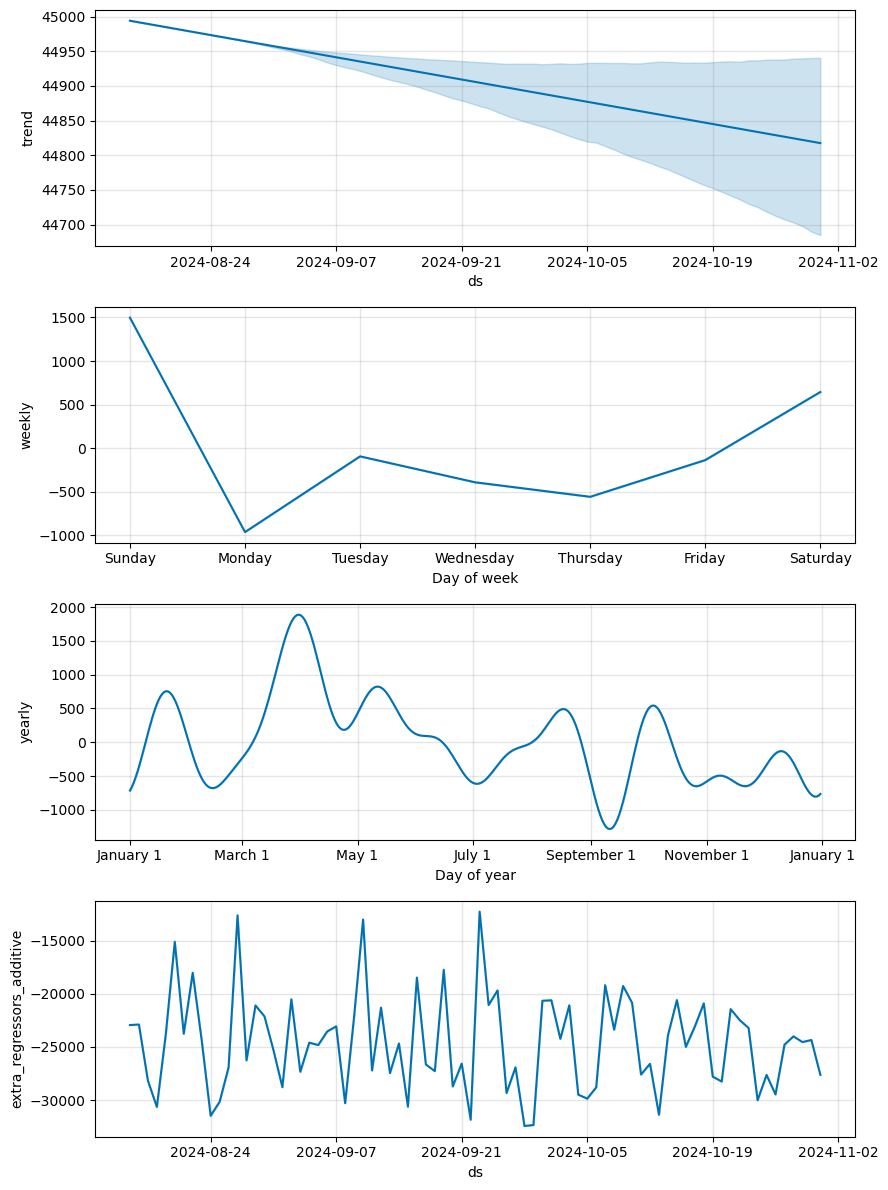

In [24]:
import matplotlib.pyplot as plt

# Use Prophet's built-in function to plot components
fig = model.plot_components(forecast)
plt.show()


In [25]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add forecast line
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))

# Add uncertainty interval (optional)
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill=None, mode='lines', line_color='red', line=dict(dash='dash'), name='Upper Bound'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', line_color='red', line=dict(dash='dash'), name='Lower Bound'))

# Update layout
fig.update_layout(title='Forecasted Values with Prophet',
                  xaxis_title='Date',
                  yaxis_title='Forecasted Value',
                  legend_title='Legend')

# Show the plot
fig.show()


C:\Users\giris\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

